In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [2]:
# Load the data
df = pd.read_excel('global_oc_index.xlsx', sheet_name='2023_dataset')

In [3]:
df.head(2)

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Southern Asia,Afghanistan,7.10,7.00,9.0,9.5,9.0,5.5,3.5,...,1.0,1.5,1.5,1.5,3.5,1.0,1.5,1.5,1.5,1.0
1,Africa,North Africa,Libya,6.93,6.57,8.5,9.5,9.0,1.0,3.5,...,2.5,2.0,1.5,1.5,1.5,1.0,2.0,1.0,1.0,1.5


<Axes: >

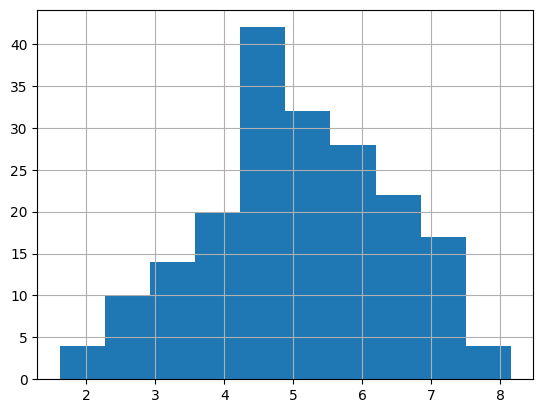

In [9]:
df['Criminality avg,'].hist()

In [8]:
features = ['Criminal markets avg,', 'Human trafficking', 'Human smuggling', 
            'Arms trafficking', 'Flora crimes', 'Fauna crimes', 
            'Non-renewable resource crimes', 'Heroin trade', 'Cocaine trade',
            'Cannabis trade', 'Synthetic drug trade', 'Cyber-dependent crimes',
            'Financial crimes', 'Trade in counterfeit goods',
            'Illicit trade in excisable goods', 'Extortion and protection racketeering',
            'Criminal actors avg,', 'Mafia-style groups', 'Criminal networks',
            'State-embedded actors', 'Foreign actors', 'Private sector actors',
            'Resilience avg,', 'Political leadership and governance',
            'Government transparency and accountability', 'International cooperation',
            'National policies and laws', 'Judicial system and detention',
            'Law enforcement', 'Territorial integrity', 'Anti-money laundering',
            'Economic regulatory capacity', 'Victim and witness support',
            'Prevention', 'Non-state actors']

target = 'Criminality avg,'

In [10]:
# Drop rows with missing target
df = df.dropna(subset=[target])

# Separate features and target
X = df[features]
y = df[target]

In [11]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaling and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [12]:
# Evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Save model
joblib.dump(pipeline, 'crime_index_model.pkl')

Model Performance:
Mean Squared Error: 0.04
R-squared: 0.98


['crime_index_model.pkl']

In [ ]:
### Nouvelle version

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the data
df = pd.read_excel('global_oc_index.xlsx', sheet_name='2023_dataset')

# Define features and target
features = ['Criminal markets avg,', 'Human trafficking', 'Human smuggling', 
            'Arms trafficking', 'Flora crimes', 'Fauna crimes', 
            'Non-renewable resource crimes', 'Heroin trade', 'Cocaine trade',
            'Cannabis trade', 'Synthetic drug trade', 'Cyber-dependent crimes',
            'Financial crimes', 'Trade in counterfeit goods',
            'Illicit trade in excisable goods', 'Extortion and protection racketeering',
            'Criminal actors avg,', 'Mafia-style groups', 'Criminal networks',
            'State-embedded actors', 'Foreign actors', 'Private sector actors',
            'Resilience avg,', 'Political leadership and governance',
            'Government transparency and accountability', 'International cooperation',
            'National policies and laws', 'Judicial system and detention',
            'Law enforcement', 'Territorial integrity', 'Anti-money laundering',
            'Economic regulatory capacity', 'Victim and witness support',
            'Prevention', 'Non-state actors']

target = 'Criminality avg,'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Separate features and target
X = df[features]
y = df[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaling and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Binarize the target variable for confusion matrix and ROC curve (e.g., threshold at median)
y_test_bin = (y_test > y_test.median()).astype(int)
y_pred_bin = (y_pred > y_test.median()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred)
roc_auc = auc(fpr, tpr)

# Displaying metrics
print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Save the model
joblib.dump(pipeline, 'crime_index_model.pkl')

# Plot the Confusion Matrix
fig, ax = plt.subplots()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Criminality", "High Criminality"])
cm_display.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC Curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.show()


NameError: name 'preprocessor' is not defined

In [18]:
### Nouvelle version bis

In [20]:
# Importation des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des affichages
pd.set_option('display.max_columns', None)
%matplotlib inline

ImportError: cannot import name '_check_n_features' from 'sklearn.utils.validation' (C:\Users\s.diedhiou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py)

In [ ]:
# 1. Chargement des données

In [ ]:
# Chargement des données
def charger_donnees():
    try:
        df = pd.read_excel('global_oc_index.xlsx', sheet_name='2023_dataset')
        print("Données chargées avec succès. Dimensions :", df.shape)
        return df
    except Exception as e:
        print("Erreur lors du chargement des données :", e)
        return None

# Exécution du chargement
df = charger_donnees()

# Affichage des premières lignes
if df is not None:
    display(df.head())

In [ ]:
# 2. Analyse exploratoire des données

In [ ]:
# Analyse statistique de base
if df is not None:
    print("\nStatistiques descriptives :")
    display(df.describe())
    
    # Distribution de la variable cible
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Criminality avg,'], kde=True, bins=30)
    plt.title('Distribution des scores de criminalité')
    plt.xlabel('Score de criminalité')
    plt.ylabel('Fréquence')
    plt.show()
    
    # Corrélations
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Matrice de corrélation')
    plt.show()

In [ ]:
# 3. Préparation des données

In [ ]:
def preparer_donnees(df):
    # Vérification des données manquantes
    print("\nValeurs manquantes par colonne :")
    display(df.isnull().sum())
    
    # Sélection des features et de la target
    features = df.drop(columns=['Country', 'Region', 'Continent', 'Criminality avg,'])
    target = df['Criminality avg,']
    
    # Séparation des colonnes numériques
    numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
    
    # Création du pipeline de prétraitement
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
    
    print("\nPrétraitement configuré avec les colonnes :", list(numeric_features))
    return features, target, preprocessor

# Exécution de la préparation
if df is not None:
    features, target, preprocessor = preparer_donnees(df)
    display(features.head())

In [ ]:
# 4. Entraînement du modèle

In [ ]:
def entrainer_modele(features, target, preprocessor):
    # Séparation en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )
    
    print(f"\nDimensions des données :")
    print(f"Train: {X_train.shape}, Test: {X_test.shape}")
    
    # Création du pipeline complet
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1  # Utilisation de tous les cœurs disponibles
        ))
    ])
    
    # Entraînement avec affichage de la progression
    print("\nDébut de l'entraînement...")
    model.fit(X_train, y_train)
    print("Entraînement terminé!")
    
    # Évaluation
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("\nRésultats de l'évaluation :")
    print(f"R² score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    
    # Visualisation des prédictions vs réelles
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.title('Comparaison des valeurs réelles et prédites')
    plt.show()
    
    # Importance des features
    if hasattr(model.named_steps['regressor'], 'feature_importances_'):
        feature_importances = model.named_steps['regressor'].feature_importances_
        features_names = model.named_steps['preprocessor'].get_feature_names_out()
        
        importance_df = pd.DataFrame({
            'Feature': features_names,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title('Top 20 des variables les plus importantes')
        plt.show()
    
    return model

# Exécution de l'entraînement
if df is not None:
    model = entrainer_modele(features, target, preprocessor)

In [ ]:
# 5. Sauvegarde du modèle

In [ ]:
def sauvegarder_modele(model):
    try:
        joblib.dump(model, 'crime_index_model.pkl')
        print("\nModèle sauvegardé avec succès sous 'crime_index_model.pkl'")
    except Exception as e:
        print("\nErreur lors de la sauvegarde du modèle :", e)

# Exécution de la sauvegarde
if 'model' in locals():
    sauvegarder_modele(model)

In [ ]:
# 6. Fonction de prédiction

In [ ]:
def faire_prediction(model, new_data):
    try:
        # Conversion en DataFrame si ce n'est pas déjà le cas
        if not isinstance(new_data, pd.DataFrame):
            new_data = pd.DataFrame([new_data])
            
        # Prédiction
        prediction = model.predict(new_data)
        print(f"\nPrédiction du score de criminalité : {prediction[0]:.2f}")
        return prediction[0]
    except Exception as e:
        print("Erreur lors de la prédiction :", e)
        return None

# Exemple d'utilisation (à adapter avec vos données)
if 'model' in locals():
    exemple_data = {
        'Criminal markets avg,': 5.0,
        'Human trafficking': 4.5,
        'Arms trafficking': 3.8,
        # Ajoutez toutes les autres features nécessaires
    }
    
    faire_prediction(model, exemple_data)